In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

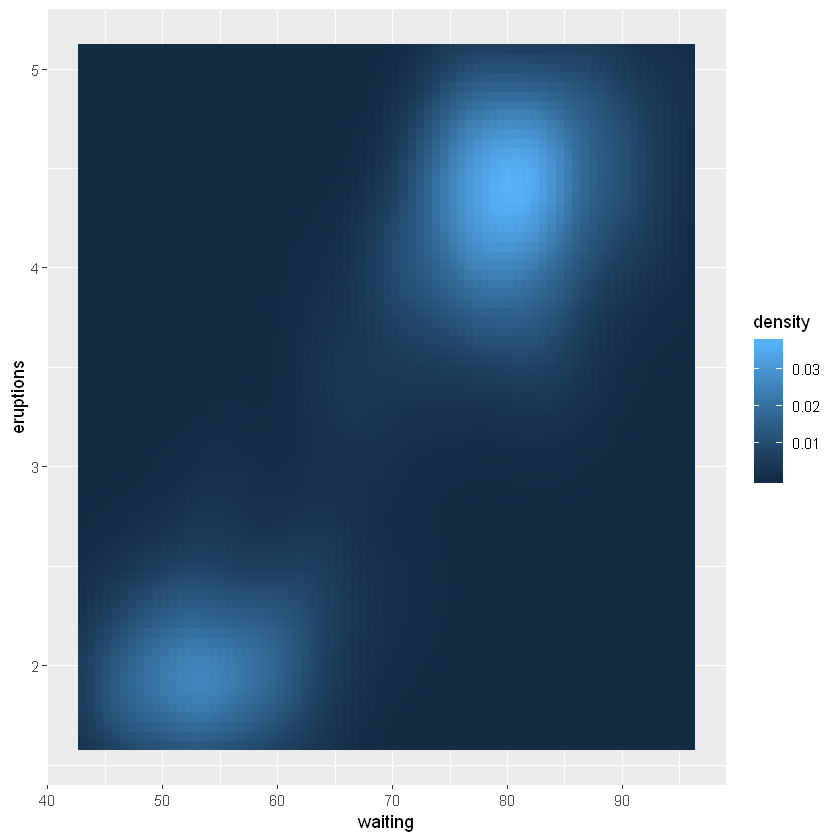

In [2]:
# The most common use for rectangles is to draw a surface. You
# always want to use geom_raster() here because it's so much
# faster, and produces smaller output when saving to PDF

ggplot(faithfuld, aes(waiting, eruptions)) +
  geom_raster(aes(fill = density))

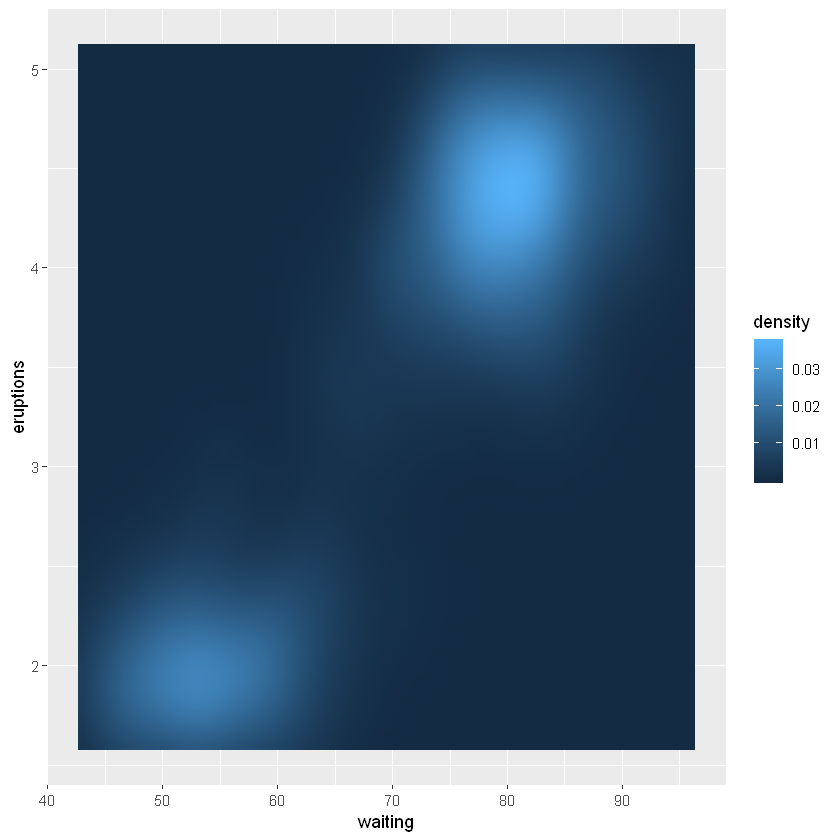

In [3]:
# Interpolation smooths the surface & is most helpful when
# rendering images.

ggplot(faithfuld, aes(waiting, eruptions)) +
  geom_raster(aes(fill = density), interpolate = TRUE)

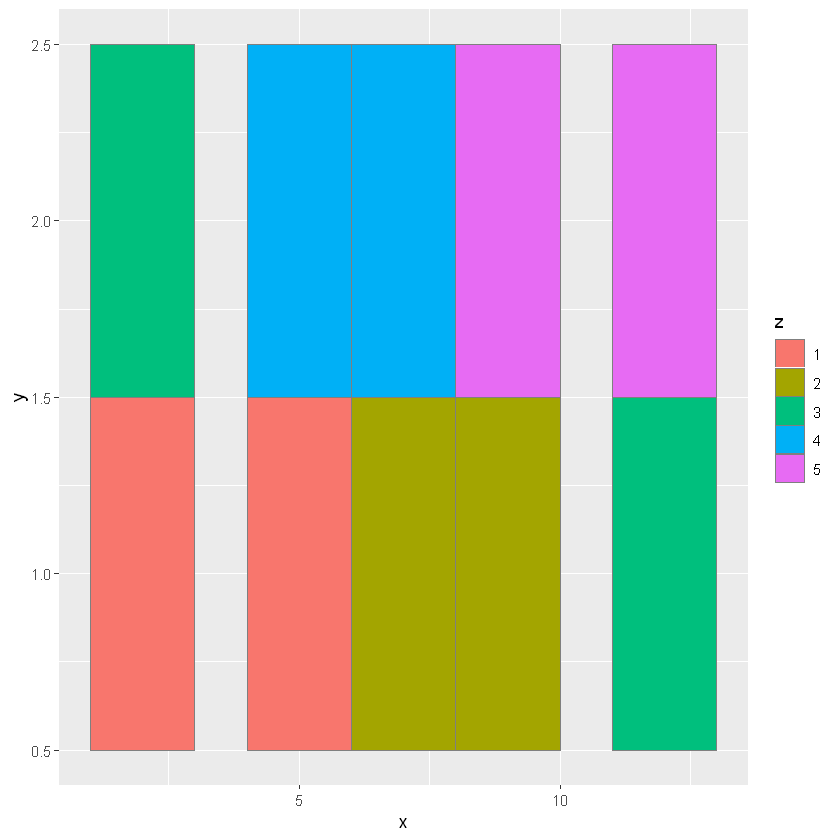

In [4]:
# If you want to draw arbitrary rectangles, use geom_tile()
# or geom_rect()

df <- data.frame(
  x = rep(c(2, 5, 7, 9, 12), 2),
  y = rep(c(1, 2), each = 5),
  z = factor(rep(1:5, each = 2)),
  w = rep(diff(c(0, 4, 6, 8, 10, 14)), 2)
)

ggplot(df, aes(x, y)) +
  geom_tile(aes(fill = z), colour = "grey50")

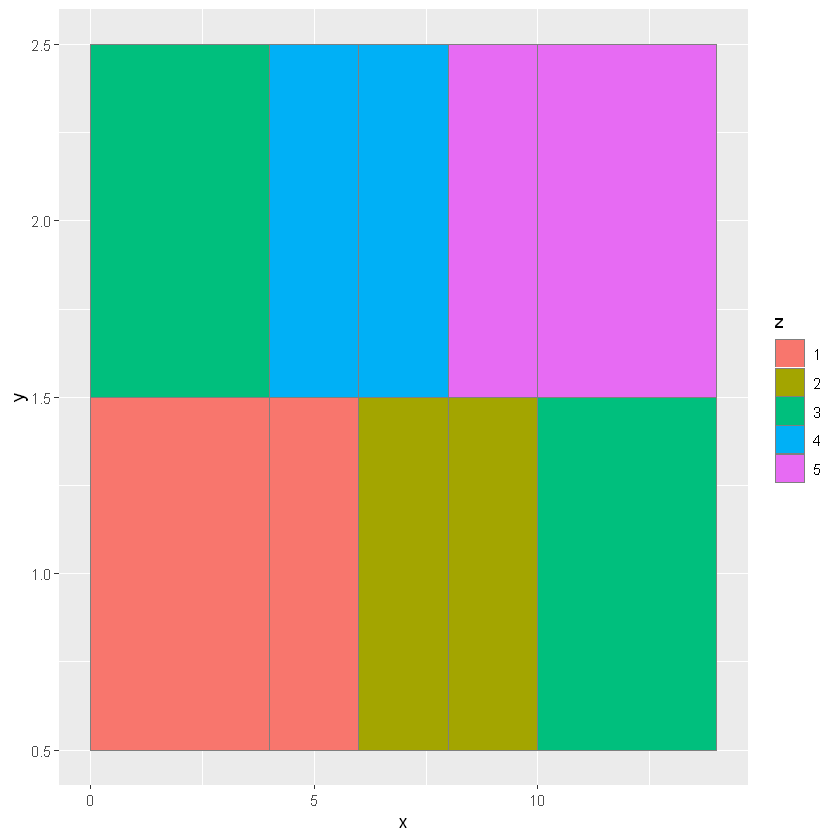

In [5]:
ggplot(df, aes(x, y, width = w)) +
  geom_tile(aes(fill = z), colour = "grey50")

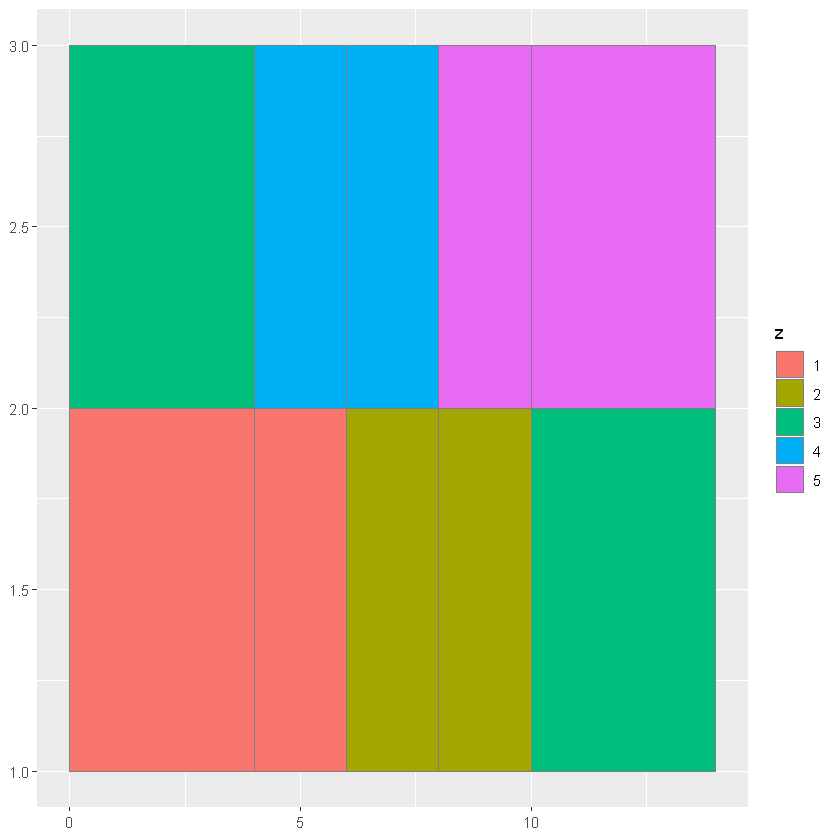

In [6]:
ggplot(df, aes(xmin = x - w / 2, xmax = x + w / 2,
               ymin = y, ymax = y + 1)) +
  geom_rect(aes(fill = z), colour = "grey50")

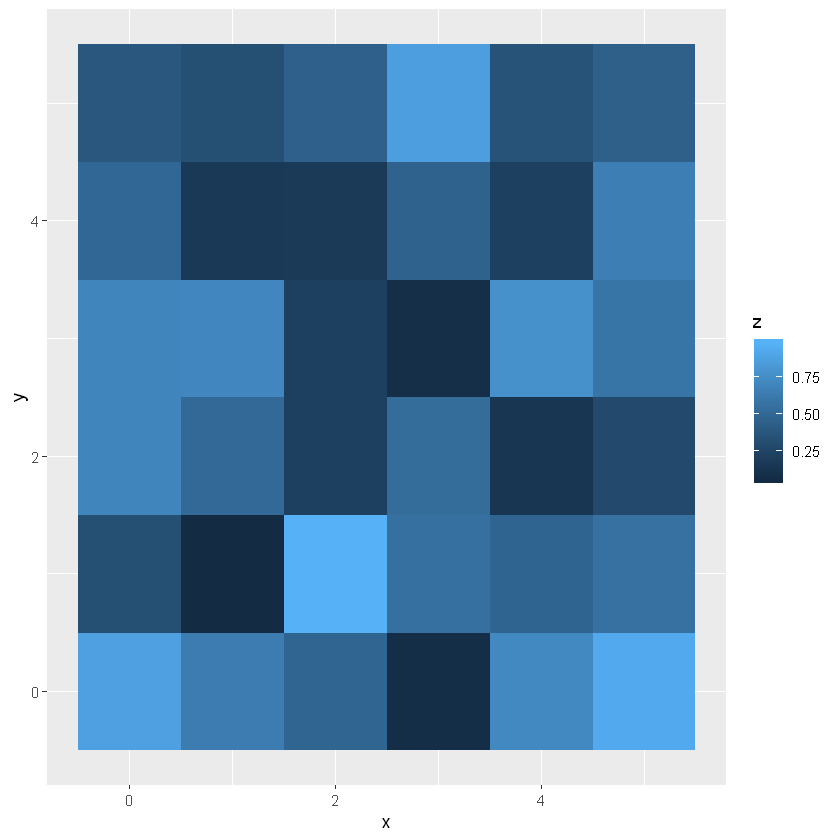

In [7]:
# Justification controls where the cells are anchored.

df <- expand.grid(x = 0:5, y = 0:5)
df$z <- runif(nrow(df))

# default is compatible with geom_tile()

ggplot(df, aes(x, y, fill = z)) + 
  geom_raster()

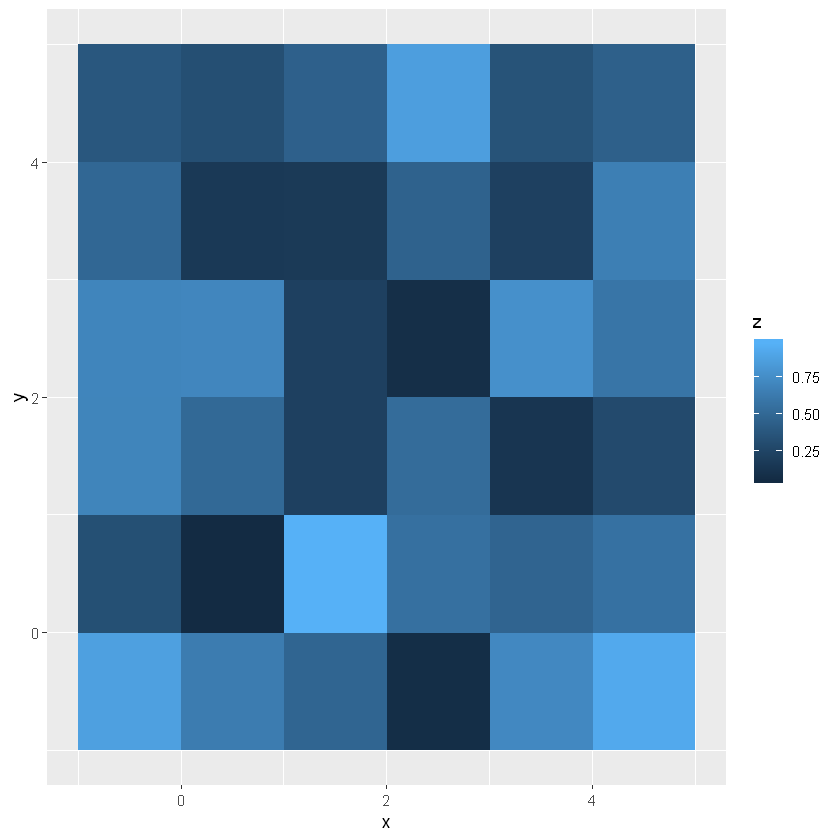

In [8]:
# zero padding

ggplot(df, aes(x, y, fill = z)) +
  geom_raster(hjust = 0, vjust = 0)

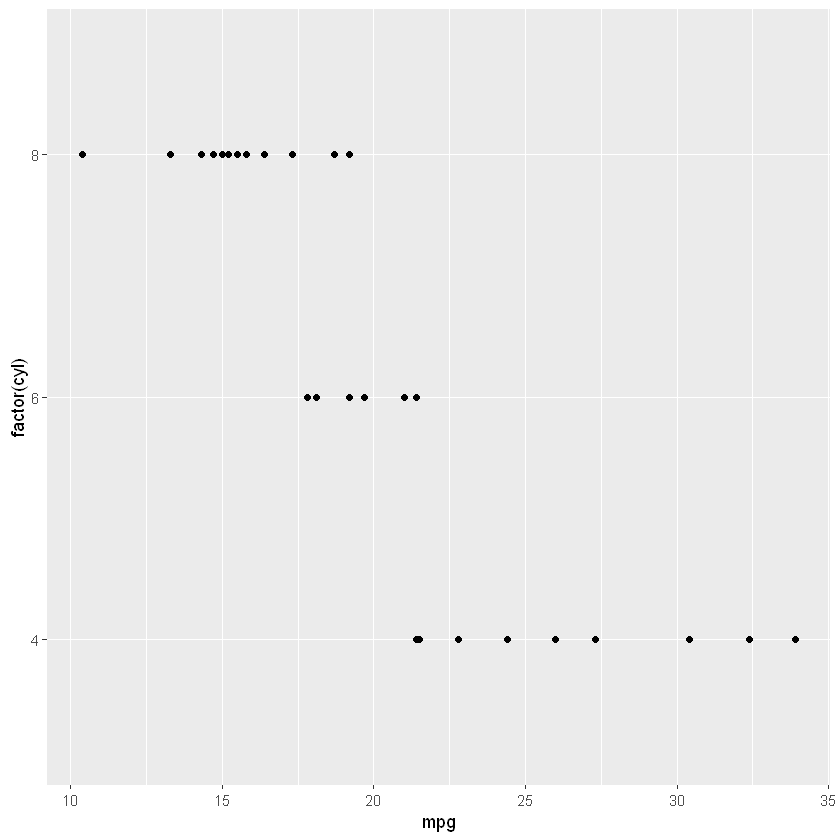

In [9]:
# Inspired by the image - density plots of Ken Knoblauch

cars <- ggplot(mtcars, aes(mpg, factor(cyl)))
cars + geom_point()

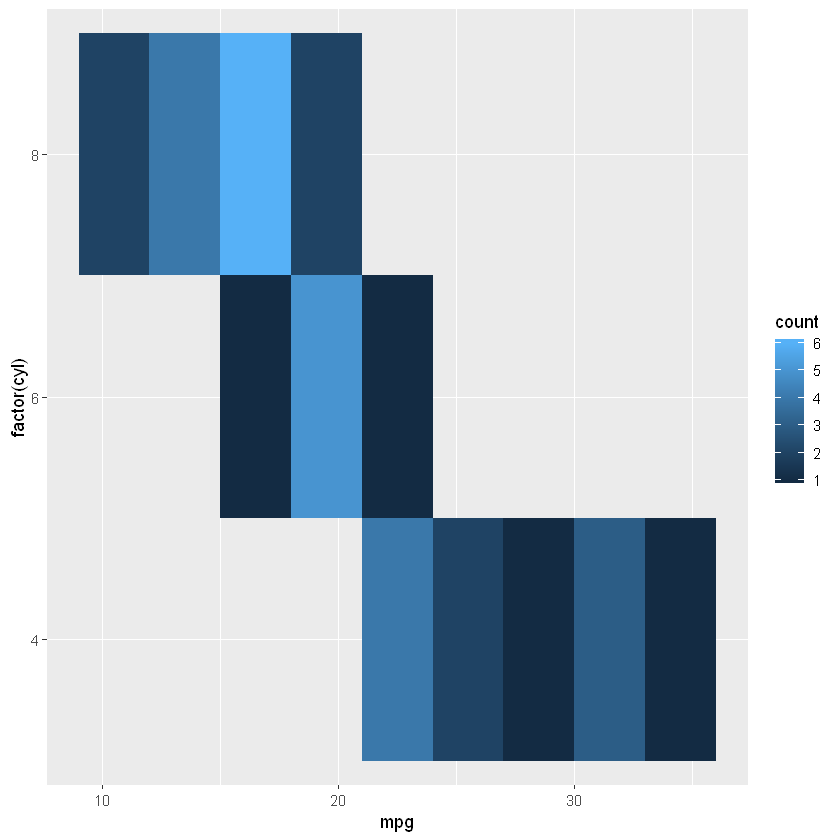

In [10]:
cars +
  stat_bin2d(aes(fill = stat(count)), binwidth = c(3, 1))

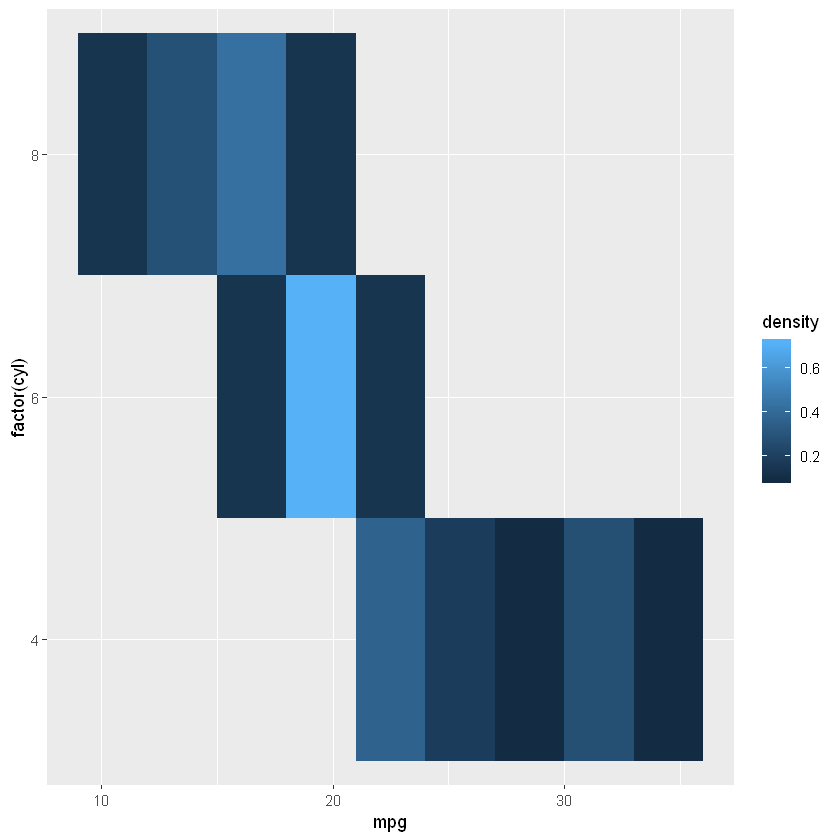

In [11]:
cars +
  stat_bin2d(aes(fill = stat(density)), binwidth = c(3, 1))

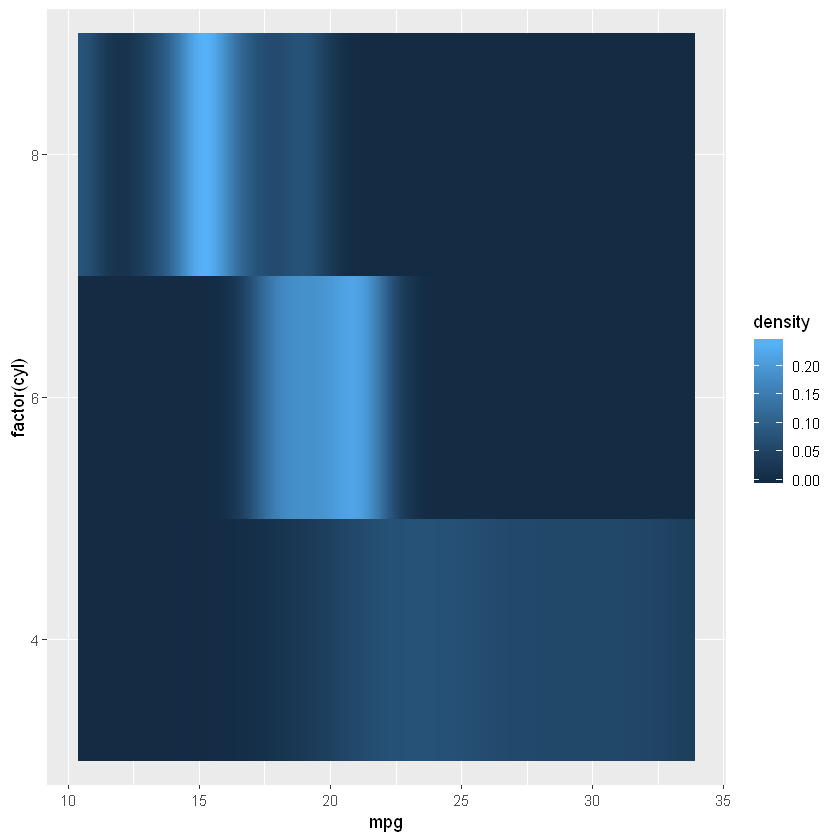

In [12]:
cars +
  stat_density(aes(fill = stat(density)), geom = "raster",
               position = "identity")

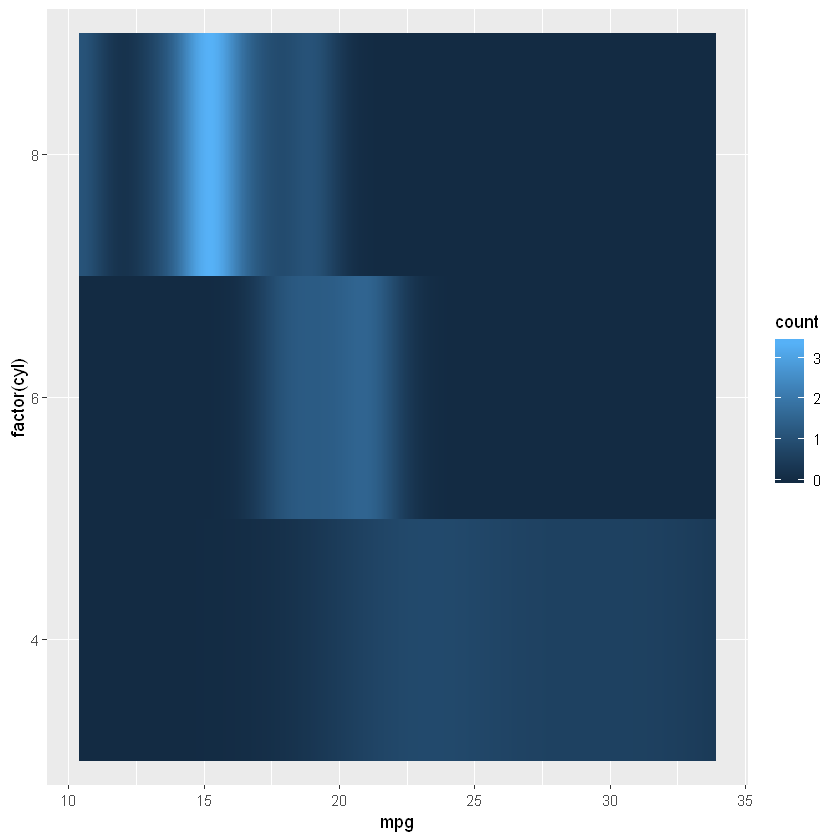

In [13]:
cars + 
  stat_density(aes(fill = stat(count)), geom = "raster",
               position = "identity")